# PyTorch WorkFlow

In [657]:
what_we_are_covering = {  1: "data (prepare and load)", 
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"  
}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [658]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.2'

## 1. Data (preparing and loading)

Data can be almost anything in Machine Learning

* Excel spreadsheet
* Images of any kind
* Videos 
* Audios
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula. 

We'll use a linear regression formula to make a straight line with known *parameters*. 

In [659]:
# Create *known* parameters
weight = 0.7 # slope
bias = 0.3 # intercept

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # y = ax + b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [660]:
len(X), len(y)

(50, 50)

## Important Concepts

Data sets can fall into one of three categories:

Training Set (where the model learns patterns from)
Validation Set (where the model patterns are tuned)
Test Set (where the model is tested to see if it is ready for the wild)

In the end, the goal is to achieve Generalization, which is the ability for a machine learning model to perform well on data it has not seen before



### Splitting data into training and test sets (one of the most important concepts in Machine Learning in general)

Let's create a training and test set with our data. 



In [661]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Better Data Visualization

In [662]:
def plot_predictions(train_data = X_train,
                        train_labels = y_train,
                        test_data = X_test,
                        test_labels = y_test,
                        predictions = None):
    
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #Show the legend
    plt.legend(prop={"size": 14})

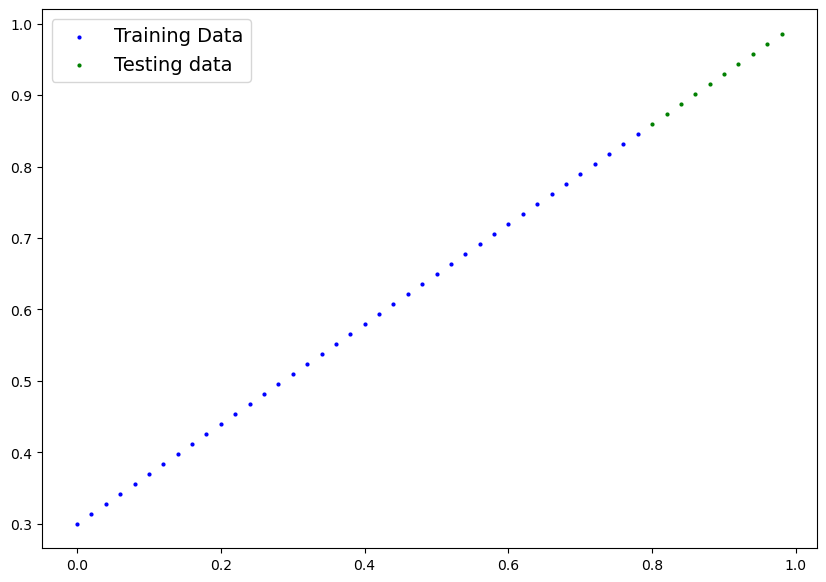

In [663]:
plot_predictions()

## 2. Build Model

First PyTorch Model

What the model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias we used to create the data)

How does it do so?
 
Through two main algorithms
1. Gradient Descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation

In [664]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # can this parameter be updated via gradient descent?
                                                dtype=torch.float # PyTorch loves the datatype torch.float32
                                                ))
        self.bias = nn.Parameter(torch.randn(1, # start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # can this parameter be updated via gradient descent?
                                             dtype=torch.float # PyTorch loves the datatype torch.float32
                                             ))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # y = mx + b (linear regression formula)

### PyTorch Model Building Essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in pyTorch live, they will help with gradient descent
* def forward() - all nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside.
So we can check our model parameters or what's inside our model using `.parameters()`.

In [665]:
# Every time we want to re-initiate our model, we re-run this cell
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [666]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

Tp check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method

In [667]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# You also do something similar with torch.no_grad(), however, inference.mode() is preferred

# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

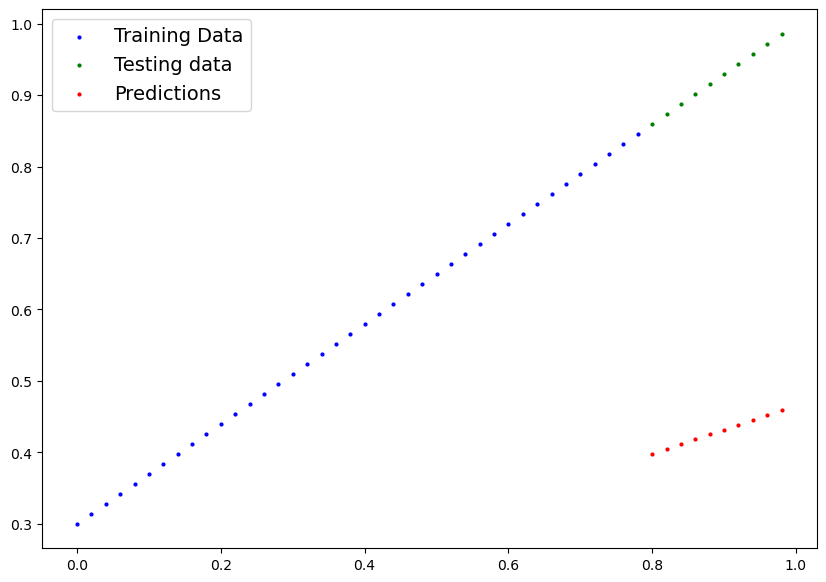

In [668]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your module predictions are is to use a loss function. 

* Note: Loss function may also be called as a cost function or criterion in different areas.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.

Inside the optimizer you'll often have to set two parameters:

* **`params`** - the model parameters you'd like to optimize, for example `params = model_0.parameters()`
* **`lr`** (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

Specifically for PyTorch we need:

* A training loop
* A testing loop

In [669]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [670]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [671]:
# Setup a loss function
loss_fn = nn.L1Loss() # measures how wrong our model is

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),  #adjusts the model to reduce loss
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` to make predictions on data - also called forward propagation)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [672]:
torch.manual_seed(42)

# An epoch is one loop through the data (this is a hyperparameter). It is the iterations
epochs = 100

# Tracking values to compare different experiments
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch set

    # 1. Forward Pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Calculate the loss value (how different are the mode's predictions to the true values)
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss}")

    # Alternatively
    # loss = torch.mean(torch.abs(y_pred-y_test))

    # 3. Zero the gradients of the optimizer (they accumulate by default). The gradient is the derivative of the cost function, so we look for the point where it is at its minimum. If the derivative is 0, so is the loss. The magnitude of the steps depends on the learning rate scheduling.
    optimizer.zero_grad()

    # 4. Perform back propagation on the loss
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    # Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # with torch.no_grad(): # Used in older versions
        # 1. Do the forward pass
        test_pred = model_0(X_test) # Pass the test data through the model

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test) # Calculate the test loss value

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


# Print out actual values 
print(f"Weight: {weight}\nBias: {bias}")


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

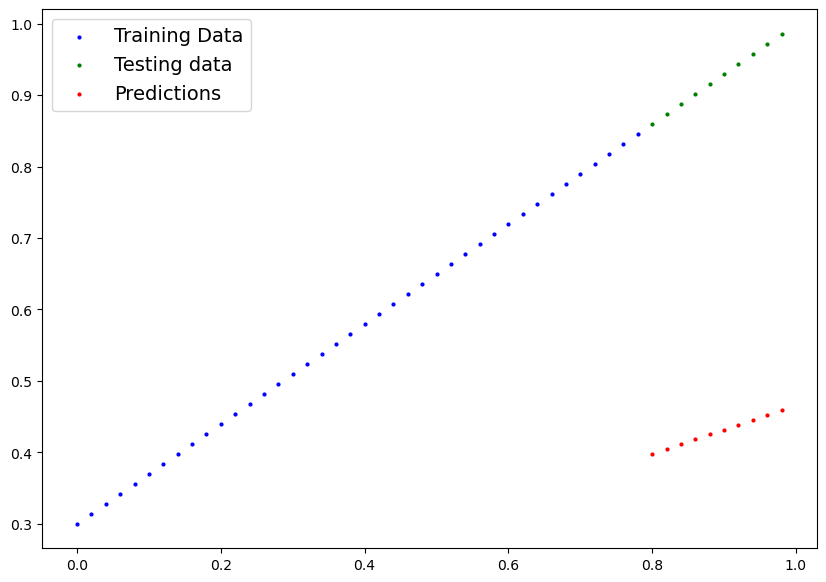

In [673]:
# For comparison
plot_predictions(predictions=y_preds)

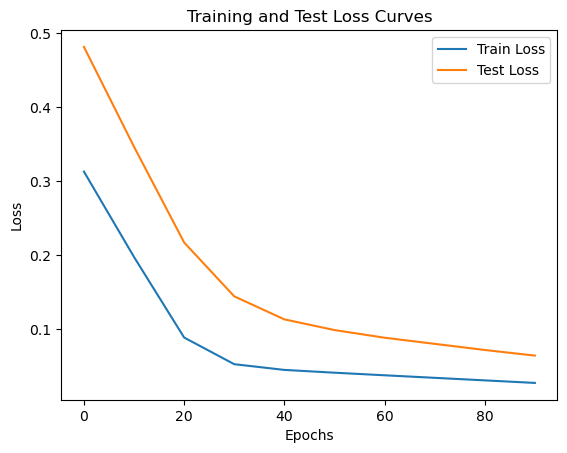

In [674]:
# Plot the loss curves to keep track of the experiments
import numpy as np

# We convert our loss values to numpy instead of tensors for the plot
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

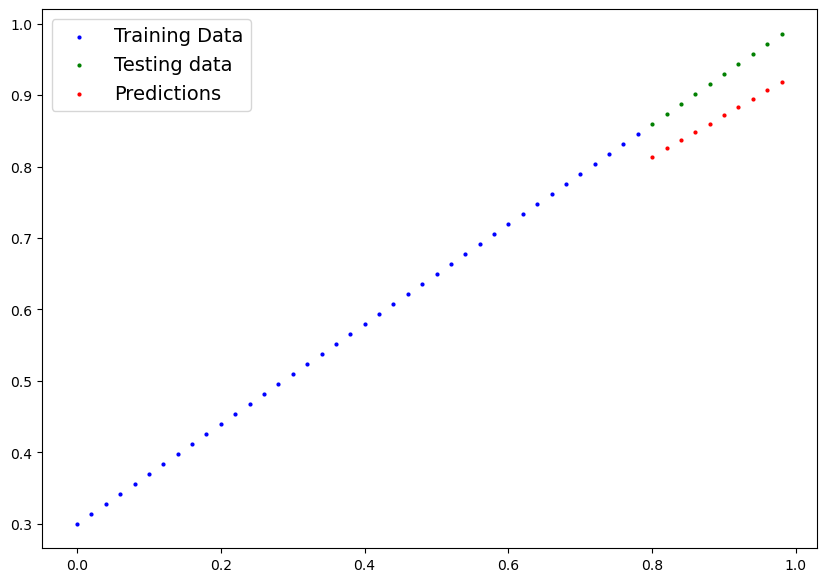

In [675]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [676]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

## Saving a model in PyTorch

There are three main methods you should know about for saving a loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved dictionary

In [677]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saved `state_dict()` into that

In [678]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [679]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [680]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [681]:
# Make some models predictions
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [682]:
# Compare loaded model predictions with original model predictions to verify successful loading
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all together


In [683]:
# Import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.2'

Create device-agnostic code.

This means if we have got access to a GPU, our code will use ot (for potentially faster computing).

If no GPU is available, the code will default to using CPU. 

In [684]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [685]:
# Create some data using the linear regression formula y = mx + b

weight = 0.5
bias = 0.2

# Create range values
start = 0
end = 1
step = 0.02

# Crate X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900]]))

In [686]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

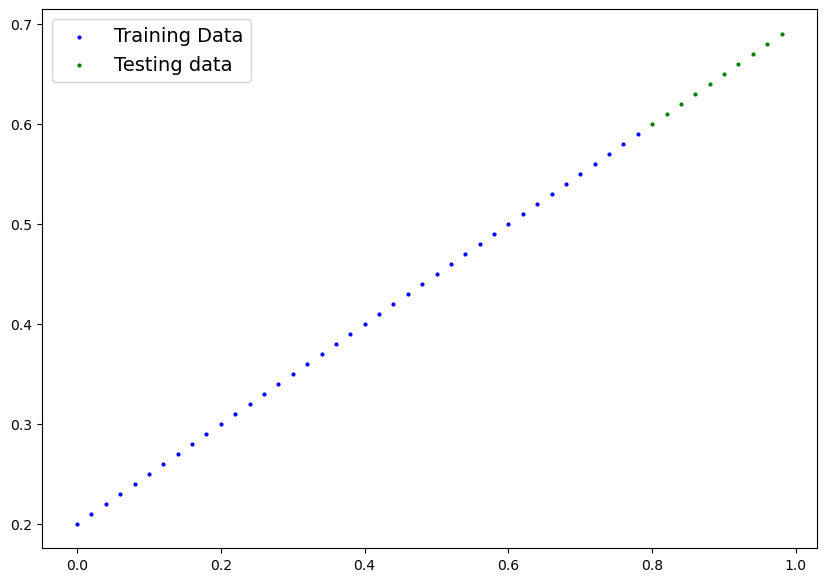

In [687]:
# Plot the data
# Note: if you do not have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [688]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # We now initialize layers that have the parameters built within themselves
        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer.
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # we take inputs and outputs of size 1

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)    

# Set the manual seed for reproducibility
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [689]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [690]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

## 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [691]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# Setup the scheduler. Without it, after a certain point, the loss would no longer decrease. 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

In [692]:
# Training loop
torch.manual_seed(42)

epochs = 200

# If we setup device agnostic code for the model we must do the same for our data. Else, it will lead to an error where these two are runnings on separate devices
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform back propagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # 6. Scheduler step
    scheduler.step()

    # Testing
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what is happening

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.7331780195236206 | Test loss: 0.8519762754440308
Epoch: 10 | Loss: 0.6179680824279785 | Test loss: 0.7172663807868958
Epoch: 20 | Loss: 0.5027582049369812 | Test loss: 0.5825566053390503
Epoch: 30 | Loss: 0.3875483274459839 | Test loss: 0.44784674048423767
Epoch: 40 | Loss: 0.2723384499549866 | Test loss: 0.31313690543174744
Epoch: 50 | Loss: 0.15712858736515045 | Test loss: 0.19055095314979553
Epoch: 60 | Loss: 0.14560773968696594 | Test loss: 0.1770801842212677
Epoch: 70 | Loss: 0.13408689200878143 | Test loss: 0.1636093407869339
Epoch: 80 | Loss: 0.12256602942943573 | Test loss: 0.15013852715492249
Epoch: 90 | Loss: 0.11104520410299301 | Test loss: 0.13666772842407227
Epoch: 100 | Loss: 0.0995243564248085 | Test loss: 0.12440931797027588
Epoch: 110 | Loss: 0.0983724594116211 | Test loss: 0.12306251376867294
Epoch: 120 | Loss: 0.09722056239843369 | Test loss: 0.12171570956707001
Epoch: 130 | Loss: 0.09606866538524628 | Test loss: 0.12036891281604767
Epoch: 140 | Lo

In [693]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5479]])),
             ('linear_layer.bias', tensor([0.2745]))])

In [694]:
weight, bias

(0.5, 0.2)

## 6.4 Making and Evaluating Predictions

In [695]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.7128],
        [0.7238],
        [0.7347],
        [0.7457],
        [0.7567],
        [0.7676],
        [0.7786],
        [0.7895],
        [0.8005],
        [0.8114]])

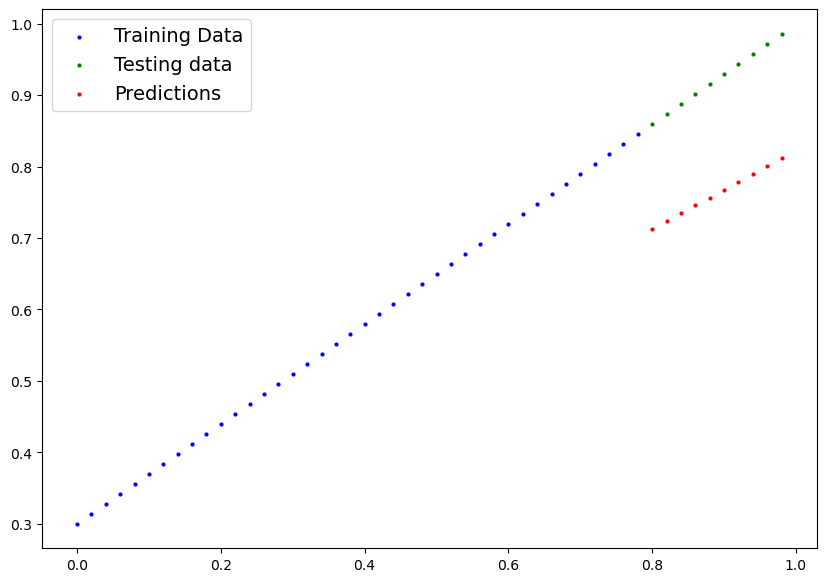

In [696]:
plot_predictions(predictions=y_preds.cpu())    

## 6.5 Saving and Loading a Trained Model

In [699]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [700]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5479]])),
             ('linear_layer.bias', tensor([0.2745]))])

In [701]:
# Load a PyTorch Model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [702]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [703]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])